## Car Brand Classification Using Deep Learning

In [19]:
# importing the required libraries

from tensorflow.keras.layers import Input ,Lambda , Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data collection
Link to the dataset:
https://github.com/krishnaik06/Deep-Learning-Car-Brand/blob/master/Datasets.zip

In [7]:
# re-sizing all the images
Image_size = [224,224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

Importing the resnet 50 library as shown below and adding preprocessing layer to thr front of resnet

Here we are using imagenet weights

In [8]:
resnet = ResNet50(input_shape= Image_size + [3],weights='imagenet',include_top = False)

[224,224]-->image size and +[3] repreasetsRGB

In [9]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [10]:
# Dont't train existing weights
for layer in resnet.layers:
    layer.trainable = False

Here the glob function will us to find the number of classes in the folder

In [11]:
folders  = glob('Datasets/train/*')

In [12]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

From this we can know that there are three classes to predict i.e audi, lamborghini, mercedes

In [14]:
# to flat the output layer of the resnet
x = Flatten()(resnet.output)

In [15]:
prediction = Dense(len(folders),activation = 'softmax')(x)


Here we are creating a output dense layer that as 3(lenght of folders) categories to predict

In [16]:
# creating a model object
model = Model(inputs= resnet.input,outputs=prediction)

In [17]:
# viewing the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [20]:
# telling the model what cost and optimization methos to use
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']

)

Data preprocessing and image data generator

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datgen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True
                                    )
test_datagen = ImageDataGenerator(rescale=1./255)

Training the model


In [22]:
training_set = train_datgen.flow_from_directory('Datasets/train',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical'
                                                )

Found 64 images belonging to 3 classes.


In [23]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 58 images belonging to 3 classes.


In [25]:
# fitting the model
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=70,
    steps_per_epoch = len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/70
2/2 [==============================] - 10s 7s/step - loss: 0.2299 - accuracy: 0.9688 - val_loss: 0.8604 - val_accuracy: 0.7414
Epoch 2/70
2/2 [==============================] - 9s 6s/step - loss: 0.1840 - accuracy: 0.9531 - val_loss: 0.9910 - val_accuracy: 0.6379
Epoch 3/70
2/2 [==============================] - 10s 6s/step - loss: 0.2401 - accuracy: 0.9219 - val_loss: 0.8651 - val_accuracy: 0.7414
Epoch 4/70
2/2 [==============================] - 9s 6s/step - loss: 0.1751 - accuracy: 0.9844 - val_loss: 0.9170 - val_accuracy: 0.7414
Epoch 5/70
2/2 [==============================] - 10s 6s/step - loss: 0.2255 - accuracy: 0.9219 - val_loss: 0.9974 - val_accuracy: 0.6207
Epoch 6/70
2/2 [==============================] - 9s 6s/step - loss: 0.2067 - accuracy: 0.9219 - val_loss: 1.0037 - val_accuracy: 0.6207
Epoch 7/70
2/2 [==============================] - 9s 6s/step - loss: 0.2163 - accuracy: 0.8750 - val_loss: 0.8822 - val_accuracy: 0.7414
Epoch 8/70
2/2 [======================

2/2 [==============================] - 9s 6s/step - loss: 0.1073 - accuracy: 0.9844 - val_loss: 0.9159 - val_accuracy: 0.7759
Epoch 61/70
2/2 [==============================] - 9s 6s/step - loss: 0.0786 - accuracy: 1.0000 - val_loss: 0.9236 - val_accuracy: 0.7586
Epoch 62/70
2/2 [==============================] - 9s 6s/step - loss: 0.1025 - accuracy: 0.9844 - val_loss: 0.8979 - val_accuracy: 0.7586
Epoch 63/70
2/2 [==============================] - 9s 6s/step - loss: 0.1107 - accuracy: 1.0000 - val_loss: 0.8878 - val_accuracy: 0.7759
Epoch 64/70
2/2 [==============================] - 9s 6s/step - loss: 0.0762 - accuracy: 1.0000 - val_loss: 0.9180 - val_accuracy: 0.7241
Epoch 65/70
2/2 [==============================] - 9s 6s/step - loss: 0.0844 - accuracy: 1.0000 - val_loss: 0.8924 - val_accuracy: 0.7759
Epoch 66/70
2/2 [==============================] - 9s 6s/step - loss: 0.0779 - accuracy: 1.0000 - val_loss: 0.8986 - val_accuracy: 0.7586
Epoch 67/70
2/2 [=============================

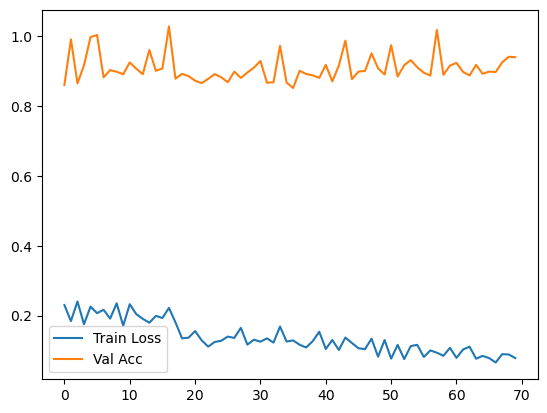

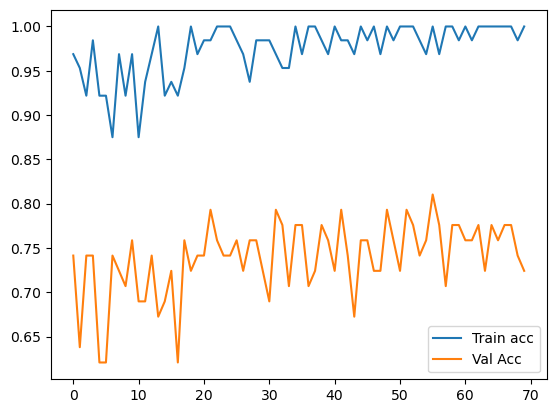

<Figure size 640x480 with 0 Axes>

In [26]:
# ploting the loss
plt.plot(r.history['loss'],label='Train Loss')
plt.plot(r.history['val_loss'],label='Val Acc')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plotting accuracy
plt.plot(r.history['accuracy'],label='Train acc')
plt.plot(r.history['val_accuracy'],label='Val Acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [28]:
y_pred  =  model.predict(test_set)

2/2 [==============================] - 7s 2s/step


In [29]:
y_pred

array([[9.96842146e-01, 1.07236498e-03, 2.08550086e-03],
       [1.34826694e-02, 1.49197564e-01, 8.37319732e-01],
       [1.79839749e-02, 8.68513525e-01, 1.13502495e-01],
       [9.39187109e-01, 6.00675382e-02, 7.45306315e-04],
       [3.18215607e-04, 9.97491717e-01, 2.19009304e-03],
       [7.43390843e-02, 2.52759928e-05, 9.25635636e-01],
       [3.11486190e-03, 9.56359208e-01, 4.05259952e-02],
       [1.46877423e-01, 7.90753663e-02, 7.74047196e-01],
       [9.82302189e-01, 1.03891399e-02, 7.30865123e-03],
       [2.94525176e-01, 5.37802637e-01, 1.67672157e-01],
       [8.98443878e-01, 6.33874536e-02, 3.81686836e-02],
       [8.56087148e-01, 2.84581818e-03, 1.41066939e-01],
       [5.00798374e-02, 4.02723581e-01, 5.47196507e-01],
       [6.37751967e-02, 5.67062583e-04, 9.35657799e-01],
       [9.67435241e-01, 1.54322749e-02, 1.71324480e-02],
       [1.72360521e-02, 8.63360643e-01, 1.19403265e-01],
       [7.42309680e-03, 1.35713723e-03, 9.91219819e-01],
       [1.73677448e-02, 2.61277

In [30]:
y_pred = np.argmax(y_pred,axis=1)

Here we are considering the max value of the each image predicted by the model

In [31]:
y_pred

array([0, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1,
       1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2], dtype=int64)

In [40]:
img = image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [41]:
x = image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [42]:
x.shape

(224, 224, 3)

In [43]:
x = x/255

In [44]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [45]:
model.predict(img_data)

1/1 [==============================] - 0s 233ms/step


array([[3.1237095e-04, 2.2401559e-04, 9.9946362e-01]], dtype=float32)